In [103]:
import pandas as pd
import numpy as np

In [104]:
ap_data = pd.read_excel("air_log_7.xlsx")

In [105]:
ap_data

,Unnamed: 0,date,all_num,temp,humid,co2,voc,pm25,light,noise,강수량,비,기온,풍속,date_day,date_hour,date_minute,date_weekday
0,0,2019-09-20 00:00:00,1,25.825,41.575,4241.525,525.225,0,126.975,49.950,0.0,0,20.900000,0.7,20,0,0,4
1,1,2019-09-20 01:00:00,0,25.975,42.825,3801.725,506.225,0,0.000,49.975,0.0,0,22.100000,0.8,20,1,0,4
2,2,2019-09-20 02:00:00,0,26.100,43.450,3427.850,486.750,0,0.000,49.950,0.0,0,22.500000,0.2,20,2,0,4
3,3,2019-09-20 03:00:00,0,25.750,46.225,2392.275,379.825,0,160.750,51.575,0.0,0,24.100000,1.4,20,3,0,4
4,4,2019-09-20 04:00:00,0,25.450,48.350,1088.625,223.500,0,0.000,50.050,0.0,0,24.500000,2.7,20,4,0,4
5,5,2019-09-20 05:00:00,0,25.625,49.875,491.400,95.400,0,0.000,50.225,0.0,0,24.600000,3.9,20,5,0,4
6,6,2019-09-20 06:00:00,0,25.525,51.300,414.025,75.050,0,1.025,50.975,0.0,0,23.600000,4.0,20,6,0,4
7,7,2019-09-20 07:00:00,4,25.425,53.000,416.300,78.625,0,368.675,51.650,0.0,0,23.200001,3.3,20,7,0,4
8,8,2019-09-20 08:00:00,10,25.875,52.950,532.050,118.550,0,412.775,52.050,0.0,0,22.500000,3.0,20,8,0,4
9,9,2019-09-20 09:00:00,18,25.550,49.875,665.300,105.675,0,444.925,52.800,0.0,0,21.700001,3.6,20,9,0,4


In [106]:
real_data = pd.read_excel("real_counting.xlsx",sheet_name = '7')

In [107]:
ap_data = pd.concat([ap_data,real_data], axis = 1)

In [108]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 21 columns):
Unnamed: 0      985 non-null int64
date            985 non-null datetime64[ns]
all_num         985 non-null int64
temp            985 non-null float64
humid           985 non-null float64
co2             985 non-null float64
voc             985 non-null float64
pm25            985 non-null int64
light           985 non-null float64
noise           985 non-null float64
강수량             985 non-null float64
비               985 non-null int64
기온              985 non-null float64
풍속              985 non-null float64
date_day        985 non-null int64
date_hour       985 non-null int64
date_minute     985 non-null int64
date_weekday    985 non-null int64
날짜              816 non-null datetime64[ns]
시간              816 non-null float64
real_number     576 non-null float64
dtypes: datetime64[ns](2), float64(11), int64(8)
memory usage: 161.7 KB


In [109]:
ap_data = ap_data.drop(['Unnamed: 0', '날짜', '시간'], axis = 1)
ap_data.set_index(ap_data['date'], inplace=True)


In [110]:
ap_data

,date,all_num,temp,humid,co2,voc,pm25,light,noise,강수량,비,기온,풍속,date_day,date_hour,date_minute,date_weekday,real_number
date,,,,,,,,,,,,,,,,,,
2019-09-20 00:00:00,2019-09-20 00:00:00,1,25.825,41.575,4241.525,525.225,0,126.975,49.950,0.0,0,20.900000,0.7,20,0,0,4,0.0
2019-09-20 01:00:00,2019-09-20 01:00:00,0,25.975,42.825,3801.725,506.225,0,0.000,49.975,0.0,0,22.100000,0.8,20,1,0,4,0.0
2019-09-20 02:00:00,2019-09-20 02:00:00,0,26.100,43.450,3427.850,486.750,0,0.000,49.950,0.0,0,22.500000,0.2,20,2,0,4,0.0
2019-09-20 03:00:00,2019-09-20 03:00:00,0,25.750,46.225,2392.275,379.825,0,160.750,51.575,0.0,0,24.100000,1.4,20,3,0,4,0.0
2019-09-20 04:00:00,2019-09-20 04:00:00,0,25.450,48.350,1088.625,223.500,0,0.000,50.050,0.0,0,24.500000,2.7,20,4,0,4,0.0
2019-09-20 05:00:00,2019-09-20 05:00:00,0,25.625,49.875,491.400,95.400,0,0.000,50.225,0.0,0,24.600000,3.9,20,5,0,4,0.0
2019-09-20 06:00:00,2019-09-20 06:00:00,0,25.525,51.300,414.025,75.050,0,1.025,50.975,0.0,0,23.600000,4.0,20,6,0,4,1.0
2019-09-20 07:00:00,2019-09-20 07:00:00,4,25.425,53.000,416.300,78.625,0,368.675,51.650,0.0,0,23.200001,3.3,20,7,0,4,5.0
2019-09-20 08:00:00,2019-09-20 08:00:00,10,25.875,52.950,532.050,118.550,0,412.775,52.050,0.0,0,22.500000,3.0,20,8,0,4,10.0


In [111]:
ap_data.isnull().sum()

date              0
all_num           0
temp              0
humid             0
co2               0
voc               0
pm25              0
light             0
noise             0
강수량               0
비                 0
기온                0
풍속                0
date_day          0
date_hour         0
date_minute       0
date_weekday      0
real_number     409
dtype: int64

Text(0, 0.5, '대여횟수')

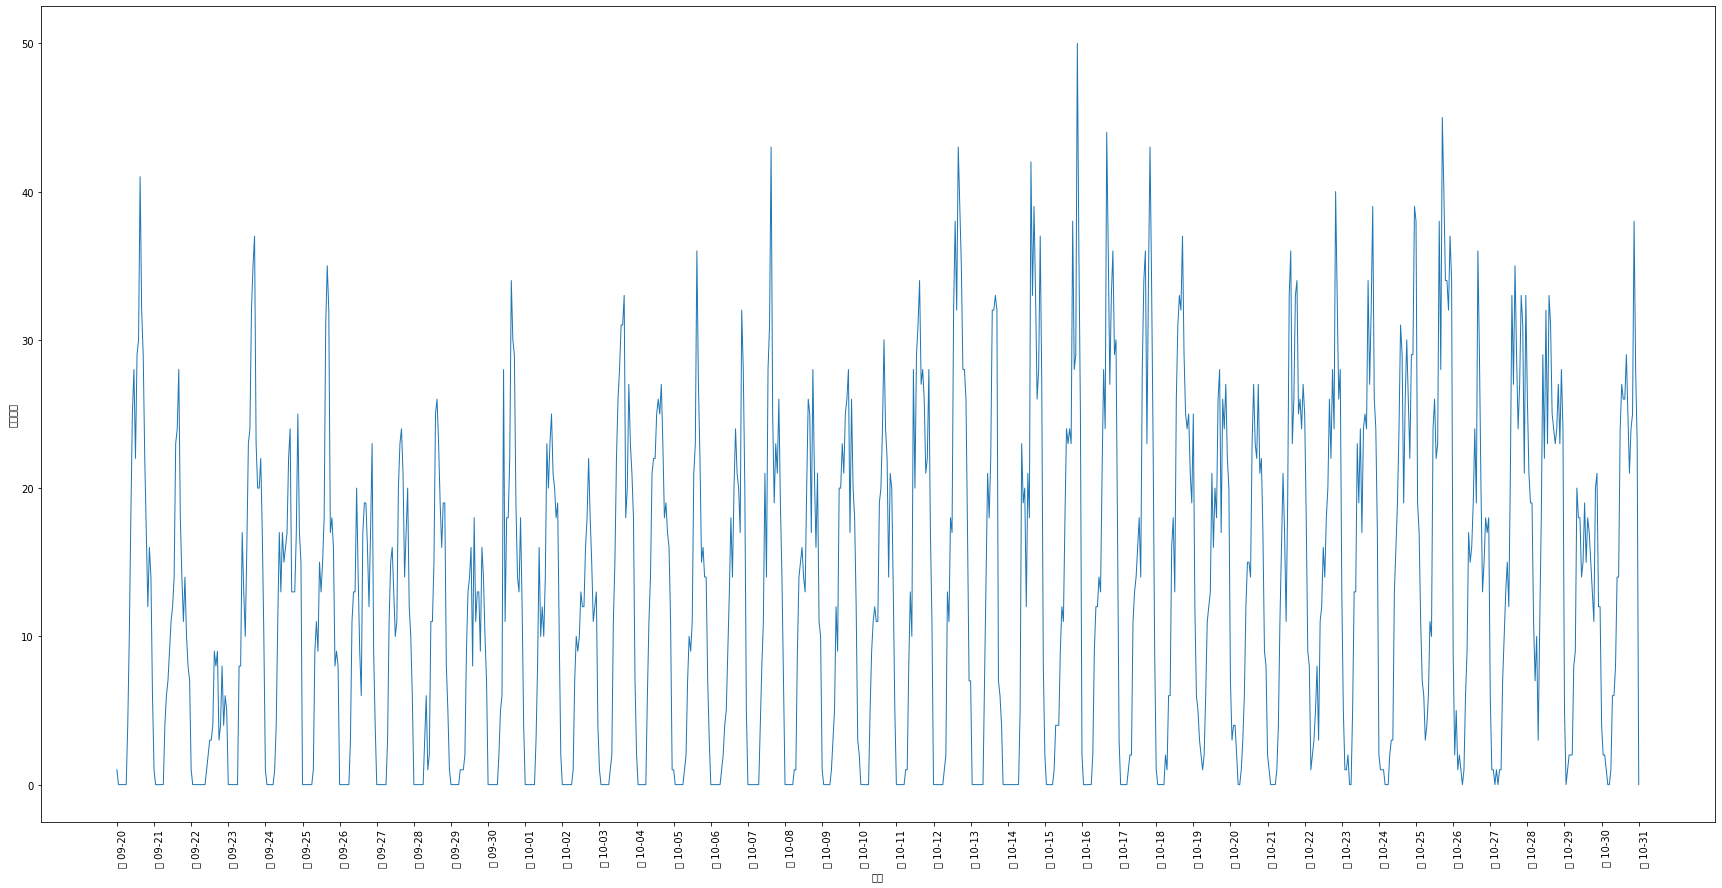

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize = (30,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-31')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name , rotation = 90, ha = "left")
plt.plot(ap_data['all_num'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [113]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 985 entries, 2019-09-20 00:00:00 to 2019-10-31 00:00:00
Data columns (total 18 columns):
date            985 non-null datetime64[ns]
all_num         985 non-null int64
temp            985 non-null float64
humid           985 non-null float64
co2             985 non-null float64
voc             985 non-null float64
pm25            985 non-null int64
light           985 non-null float64
noise           985 non-null float64
강수량             985 non-null float64
비               985 non-null int64
기온              985 non-null float64
풍속              985 non-null float64
date_day        985 non-null int64
date_hour       985 non-null int64
date_minute     985 non-null int64
date_weekday    985 non-null int64
real_number     576 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(7)
memory usage: 146.2 KB


In [142]:
ap_data = ap_data[:576]

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize = (30,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-13-31')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name , rotation = 90, ha = "left")
plt.plot(ap_data['real_number'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

ValueError: could not convert string to Timestamp

<Figure size 2160x1080 with 0 Axes>

In [196]:
from sklearn.preprocessing import minmax_scale

df = pd.DataFrame()
df['date'] = ap_data['date']
df['all_num'] = minmax_scale(ap_data['all_num'], axis=0, copy=True)
df['real_number'] = minmax_scale(ap_data['real_number'], axis=0, copy=True)
df['temp']= minmax_scale(ap_data['temp'], axis=0, copy=True)
df['humid']= minmax_scale(ap_data['humid'], axis=0, copy=True)
df['co2']= minmax_scale(ap_data['co2'], axis=0, copy=True)
df['voc']= minmax_scale(ap_data['voc'], axis=0, copy=True)
df['pm25']= minmax_scale(ap_data['pm25'], axis=0, copy=True)
df['light']= minmax_scale(ap_data['light'], axis=0, copy=True)
df['noise']= minmax_scale(ap_data['noise'], axis=0, copy=True)
df['hour']= minmax_scale(ap_data['date_hour'], axis=0, copy=True)
df['weekday']= minmax_scale(ap_data['date_weekday'], axis=0, copy=True)
df['강수량']= minmax_scale(ap_data['강수량'], axis=0, copy=True)
df['비']= minmax_scale(ap_data['비'], axis=0, copy=True)
df['기온']= minmax_scale(ap_data['기온'], axis=0, copy=True)
df['풍속']= minmax_scale(ap_data['풍속'], axis=0, copy=True)
df['day'] = minmax_scale(ap_data['date_day'], axis=0, copy=True)
df['hour'] = minmax_scale(ap_data['date_hour'], axis=0, copy=True)
df['minute'] = minmax_scale(ap_data['date_minute'], axis=0, copy=True)
df['weekday'] = minmax_scale(ap_data['date_weekday'], axis=0, copy=True)
df.set_index(df['date'], inplace=True)

In [197]:
# y = df['real_number'][:576]
X = df.index.astype("int64").values.reshape(-1,1)
y = df['real_number']

In [198]:
X

array([[1568937600000000000],
       [1568941200000000000],
       [1568944800000000000],
       [1568948400000000000],
       [1568952000000000000],
       [1568955600000000000],
       [1568959200000000000],
       [1568962800000000000],
       [1568966400000000000],
       [1568970000000000000],
       [1568973600000000000],
       [1568977200000000000],
       [1568980800000000000],
       [1568984400000000000],
       [1568988000000000000],
       [1568991600000000000],
       [1568995200000000000],
       [1568998800000000000],
       [1569002400000000000],
       [1569006000000000000],
       [1569009600000000000],
       [1569013200000000000],
       [1569016800000000000],
       [1569020400000000000],
       [1569024000000000000],
       [1569027600000000000],
       [1569031200000000000],
       [1569034800000000000],
       [1569038400000000000],
       [1569042000000000000],
       [1569045600000000000],
       [1569049200000000000],
       [1569052800000000000],
       [15

In [179]:
y

date
2019-09-20 00:00:00    0.000000
2019-09-20 01:00:00    0.000000
2019-09-20 02:00:00    0.000000
2019-09-20 03:00:00    0.000000
2019-09-20 04:00:00    0.000000
                         ...   
2019-10-13 19:00:00    0.576923
2019-10-13 20:00:00    0.641026
2019-10-13 21:00:00    0.576923
2019-10-13 22:00:00    0.282051
2019-10-13 23:00:00    0.153846
Name: real_number, Length: 576, dtype: float64

In [180]:
y.isnull().sum()

0

In [193]:
from sklearn.ensemble import GradientBoostingRegressor

# n_train = 576

# nn1 = []

# def eval_on_features(features, target, regressor):
#     X_train, X_test = features[:n_train], features[n_train:]
#     y_train = target[:n_train]
#     regressor.fit(X_train,y_train)
# #     print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
#     y_pred = minmax_scale(regressor.predict(X_test))
#     y_pred_train = minmax_scale(regressor.predict(X_train))

#     plt.figure(figsize = (15,15))
    
#     plt.xticks(range(0, len(X), 15), xticks_name, rotation = 300, ha="left")
    
#     plt.plot(range(n_train), y_train, label = "훈련")
# #     plt.plot(range(n_train, len(y_test) +  n_train), ,'-', label = "테스트")
#     plt.plot(range(n_train), y_pred_train, '--', label = "훈련 예측")
#     plt.plot(range(n_train, 985), y_pred, '--', label = "테스트 예측")
#     plt.legend(loc = (1.01, 0))
#     plt.xlabel("날짜")
#     plt.ylabel("대여횟수")
#     nn1.append(y_pred)

# from sklearn.ensemble import GradientBoostingRegressor

# n_train = 576
# nn = []

# def eval_on_features(features, target, regressor):
#     X_train, X_test = features[:n_train], features[n_train:]
#     y_train = target[:n_train]
#     regressor.fit(X_train,y_train)
# #     print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
#     y_pred = regressor.predict(X_test)
#     y_pred_train = regressor.predict(X_train)

#     plt.figure(figsize = (15,15))
    
#     plt.xticks(range(0, len(X), 8), xticks_name, rotation = 300, ha="left")
    
#     plt.plot(range(n_train), y_train, label = "훈련")
# #     plt.plot(range(n_train, len(y_test) +  n_train), ,'-', label = "테스트")
#     plt.plot(range(n_train), y_pred_train, '--', label = "훈련 예측")
#     plt.plot(range(n_train, 985), y_pred, '--', label = "테스트 예측")
#     plt.legend(loc = (1.01, 0))
#     plt.xlabel("날짜")
#     plt.ylabel("대여횟수")
#     nn.append(y_pred)
    
    
from sklearn.ensemble import GradientBoostingRegressor

n_train = 450

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (15,10))
    
    plt.xticks(range(0, len(X), 12), xticks_name, rotation = 300, ha="left")
    
    plt.plot(range(n_train), y_train, label = "train")
    plt.plot(range(n_train, len(y_test) +  n_train), y_test, '-', label = "test")
    plt.plot(range(n_train), y_pred_train, '--', label = "predict_train")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "predict_test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("date")
    plt.ylabel("count")  

테스트 세트 R^2: 0.90


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

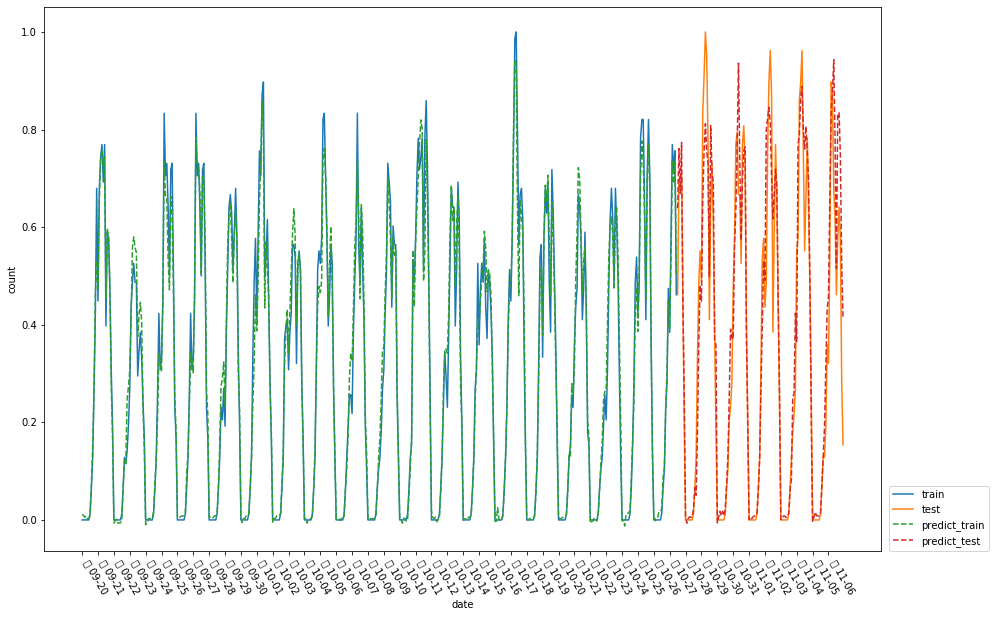

In [194]:
X_hour_week = np.hstack([df.hour.values.reshape(-1,1), df.기온.values.reshape(-1,1),
                       df.temp.values.reshape(-1,1),df.light.values.reshape(-1,1),
                        df.voc.values.reshape(-1,1),df.all_num.values.reshape(-1,1)])

eval_on_features(X_hour_week, y, GradientBoostingRegressor())

In [172]:
nn1

[array([0.02182516, 0.02910485, 0.02910485, 0.02910485, 0.02910485,
        0.027344  , 0.02339789, 0.06305652, 0.16789776, 0.37552663,
        0.49111458, 0.47665648, 0.46363803, 0.66475134, 0.66653215,
        0.79679736, 0.76402885, 0.72286683, 0.56529454, 0.78155165,
        0.78411574, 0.73814718, 0.64317989, 0.35256737, 0.16428787,
        0.17220949, 0.03178117, 0.02474705, 0.02474705, 0.02474705,
        0.02631977, 0.08630249, 0.12125481, 0.24661289, 0.46836149,
        0.48101939, 0.52686191, 0.63549395, 0.72485707, 0.74354784,
        0.80773379, 0.67033727, 0.63779283, 0.72730624, 0.77613443,
        0.74335056, 0.5997177 , 0.48901238, 0.0223624 , 0.03202674,
        0.03202674, 0.03202674, 0.03202674, 0.03202674, 0.0368552 ,
        0.10307208, 0.13045165, 0.35792409, 0.43943258, 0.4519677 ,
        0.46222704, 0.66109145, 0.73379158, 0.74970657, 0.82621142,
        0.73432191, 0.60715031, 0.77726384, 0.77572382, 0.74373884,
        0.5831034 , 0.30567991, 0.01695266, 0.02

In [123]:
yy1 = []

for i in nn1:
    yy1.append(i*120)
    
yy1

[array([  2.62289367,   3.49734436,   3.49734436,   3.49734436,
          3.49734436,   3.28582462,   2.81180752,   7.57623604,
         20.17342467,  44.21941083,  58.99643231,  57.25985182,
         55.69967494,  79.85548725,  80.36037342,  95.70060754,
         91.78134371,  86.83672077,  68.11315248,  93.89029856,
         94.19697428,  88.66827956,  77.25947903,  42.35111054,
         19.728457  ,  20.68028527,   3.81132509,   2.97255336,
          2.97255336,   2.97255336,   3.16146721,  10.36674776,
         14.56581047,  29.62961354,  56.26778622,  57.78761058,
         63.29442454,  76.34040794,  87.07636247,  89.32213955,
         97.03281713,  80.52771927,  76.61765113,  87.37445238,
         93.23919471,  89.16476483,  72.04116716,  58.73971457,
          2.68715453,   3.84700405,   3.84700405,   3.84700405,
          3.84700405,   3.84700405,   4.42705462,  12.3814433 ,
         15.67050718,  43.00115844,  52.79261247,  54.29518761,
         55.52780086,  79.41595036,  88.

In [124]:
predict = pd.DataFrame(np.transpose(yy1))

In [125]:
predict = predict[:408]

In [126]:
predict
predict.loc[:,'date']=pd.Series(pd.date_range("2019-10-14 00:00", "2019-10-31 00:00", freq="H"))

In [127]:
predict = predict.set_index('date')
predict = predict.rename(columns = {'0':'predict'})

In [128]:
predict

,0
date,
2019-10-14 00:00:00,2.622894
2019-10-14 01:00:00,3.497344
2019-10-14 02:00:00,3.497344
2019-10-14 03:00:00,3.497344
2019-10-14 04:00:00,3.497344
2019-10-14 05:00:00,3.285825
2019-10-14 06:00:00,2.811808
2019-10-14 07:00:00,7.576236
2019-10-14 08:00:00,20.173425


In [129]:
predict.to_excel('predict_7.xlsx')

In [431]:
# pd.DataFrame(np.transpose(yy1))

In [432]:
pd.concat(['date_data','predict'], axis = 1)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [418]:
date_data['predict']

datetime
2019-10-14 00:00:00   NaN
2019-10-14 01:00:00   NaN
2019-10-14 02:00:00   NaN
2019-10-14 03:00:00   NaN
2019-10-14 04:00:00   NaN
                       ..
2019-10-30 20:00:00   NaN
2019-10-30 21:00:00   NaN
2019-10-30 22:00:00   NaN
2019-10-30 23:00:00   NaN
2019-10-31 00:00:00   NaN
Name: predict, Length: 409, dtype: float64

In [419]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: -0.09


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

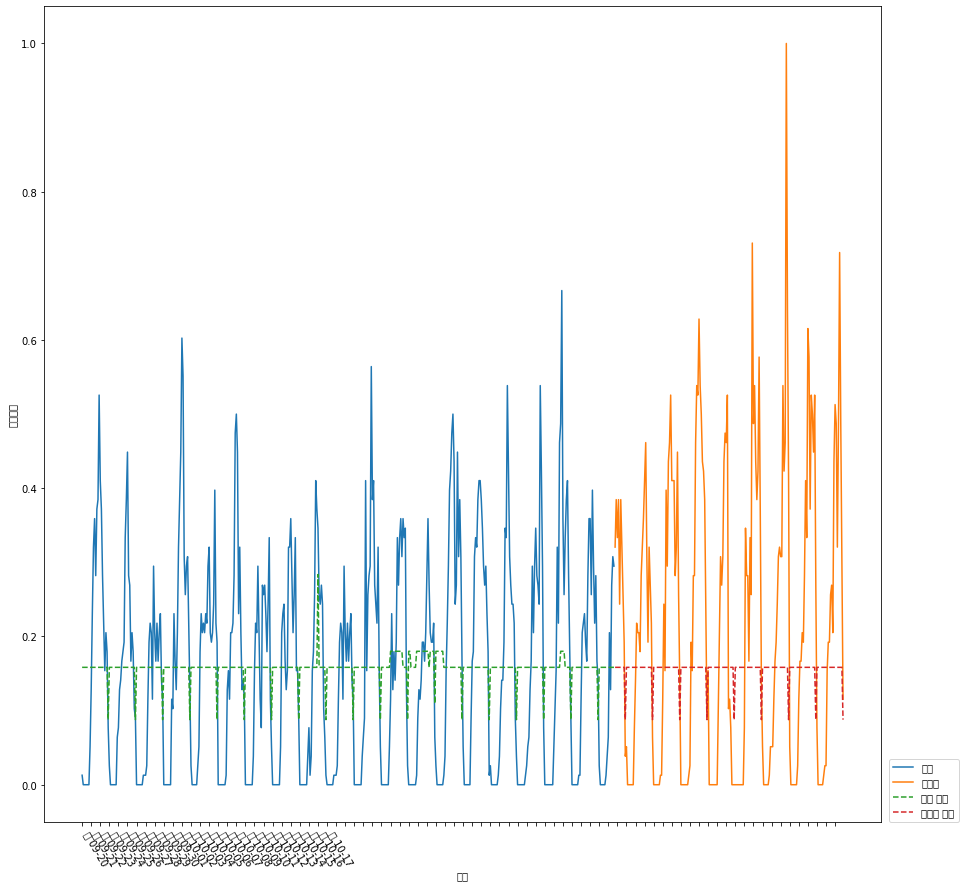

In [194]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: -0.09


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

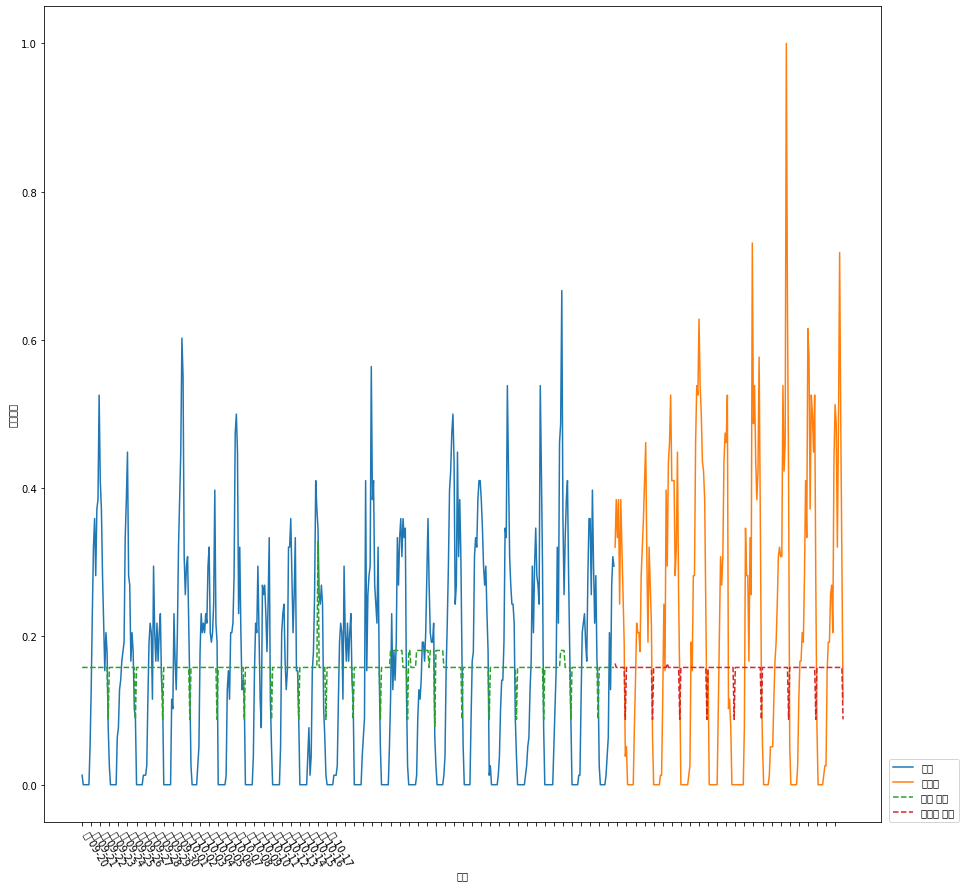

In [195]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [196]:
hour = ["%02d:00" % i for i in range(0, 24, 1)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [197]:
features_poly = poly_transformer.get_feature_names(features) # 모든 상호작용 특성에 이름을 달아줌

# 그리고 계수가 0이 아닌 것만 출력
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

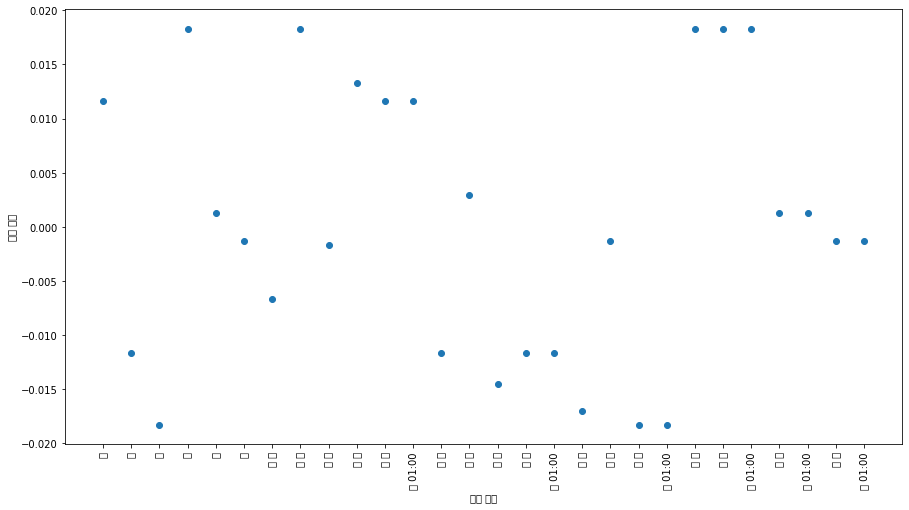

In [199]:
plt.figure(figsize=(15, 8))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X = ap_data[['date_day','date_hour','date_weekday','temp','humid','co2','voc','pm25','light','noise','기온','강수량','습도','풍속']].values.reshape(-1,14)
y = ap_data['all_num'].values.reshape(-1,1)


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbc = GradientBoostingClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(x_train, y_train)

score_train = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train))

# 1.000

score_test = gbc.score(x_test, y_test) # 일반화 정확도
print('{:.3f}'.format(score_test))

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.000
0.363


In [44]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)
gbc.fit(x_train, y_train)

score_train_pre = gbc.score(x_train, y_train) # train set 정확도
print('{:.3f}'.format(score_train_pre))
# 0.995
score_test_pre = gbc.score(x_test, y_test) # 일반화 정확도
print('{:.3f}'.format(score_test_pre))

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.851
0.363


In [45]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)



score_train_lr = gbc.score(x_train, y_train)

print('{:.3f}'.format(score_train_lr))

# 0.995



score_test_lr = gbc.score(x_test, y_test) 

print('{:.3f}'.format(score_test_lr))

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.812
0.369


In [46]:
# import matplotlib

# import matplotlib.pyplot as plt

# import numpy as np



# score_set = np.round([score_train, score_test], 3)

# max_depth_score_set = np.round([score_train_pre, score_test_pre], 3)

# learning_rete_score_set = np.round([score_train_lr, score_test_lr], 3)



# index = np.arange(len(score_set))

# bar_width = 0.35

# bottom = 0.8

# list_set = [max_depth_score_set, learning_rete_score_set]

# line_set = ['--', ':']

# names = ['train', 'test']



# for i, line_set, name in zip(index, line_set, names):

#     plt.hlines(score_set[i], xmin=0-bar_width,

#                xmax=index[-1]+2*bar_width,

#                linestyle=line_set, label='default {}'.format(name))

#     plt.text(0-bar_width, score_set[i]+0.005, str(score_set[i]))



# plt.bar(index, max_depth_score_set, width=bar_width, label='adj max_depth')

# plt.bar(index+bar_width, learning_rete_score_set, width=bar_width, label='adj learning rate')

# for i, ts, te in zip(index, max_depth_score_set, learning_rete_score_set):

#     plt.text(i, (bottom+ts)/2, str(ts), horizontalalignment='center')

#     plt.text(i+bar_width, (bottom+te)/2, str(te), horizontalalignment='center')



# plt.ylim(bottom, 1.05)

# plt.xticks(index+bar_width/2, names)

# plt.ylabel('score', size=15)

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=False)

# plt.show()

In [47]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)

gbc.fit(x_train, y_train)

n_feature = 

index=np.arange(n_feature)



plt.barh(index, gbc.feature_importances_, align='center')

plt.yticks(index, cancer.feature_names)

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 



SyntaxError: invalid syntax (<ipython-input-47-3cdd536d77fe>, line 5)